 # **Import data**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns
import calendar



data = pd.read_csv(r"/kaggle/input/netflix-shows/netflix_titles.csv")
df = pd.DataFrame(data)

data.head(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...


# **Data Cleaning**

In [2]:
#checking data types

data.dtypes

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

In [3]:
#transform data types

data['date_added'] = pd.to_datetime(data['date_added'], errors='coerce')

data.head(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...


In [4]:
#checking for missing values

data.isna().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        98
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [5]:
# Drop the null values which are less than 5% from the entire data

data.dropna(subset=['date_added'], inplace=True)
data.dropna(subset=['rating'], inplace=True)
data.dropna(subset=['duration'], inplace=True)

data.isna().sum()

show_id            0
type               0
title              0
director        2538
cast             817
country          826
date_added         0
release_year       0
rating             0
duration           0
listed_in          0
description        0
dtype: int64

In [6]:
#replace missing values

data['director'].replace(np.nan, 'No Director',inplace=True)
data['country'].replace(np.nan, 'No Country',inplace=True)
data['cast'].replace(np.nan, 'No Cast',inplace=True)

data.isna().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [7]:
#create new columns

df['duration_movie'] = data['duration'].where(data['duration'].str.contains('min'), '')

df['duration_tvseries'] = data['duration'].where(data['duration'].str.contains('Season','Seasons'), '')

df['month'] = data['date_added'].dt.month

df['year'] = data['date_added'].dt.year

df.head(3)


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,duration_movie,duration_tvseries,month,year
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",90 min,,9.0,2021.0
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",,2 Seasons,9.0,2021.0
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,,1 Season,9.0,2021.0


In [8]:
#separating countries
data['country'] = data['country'].str.split(', ')
data['country'] = data['country'].apply(lambda x: x[0])
data['country'] = data['country'].str.replace(",","")

data['cast'] = data['cast'].str.split(', ')
data['cast'] = data['cast'].apply(lambda x: x[0])
data['cast'] = data['cast'].str.replace(",","")

data['listed_in'] = data['listed_in'].str.split(', ')
data['listed_in'] = data['listed_in'].apply(lambda x: x[0])
data['listed_in'] = data['listed_in'].str.replace(",","")
data['listed_in'] = data['listed_in'].str.replace("$$","")

# **Data Visualization**

**Movies vs TV Shows**

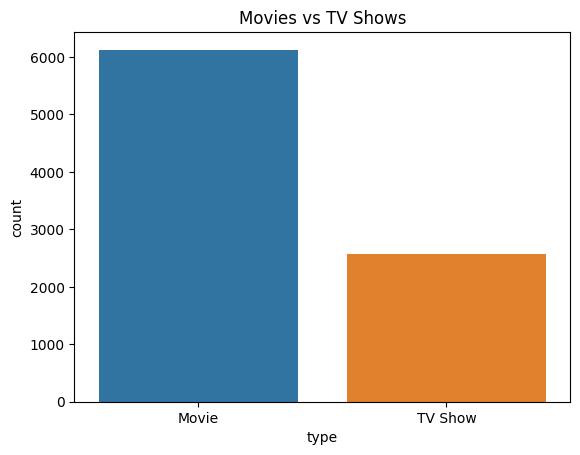

In [9]:
sns.countplot(x='type',data=data)
plt.title('Movies vs TV Shows')
plt.show()

**Top 100 Directors by the Number of Films and TV Shows They Directed**

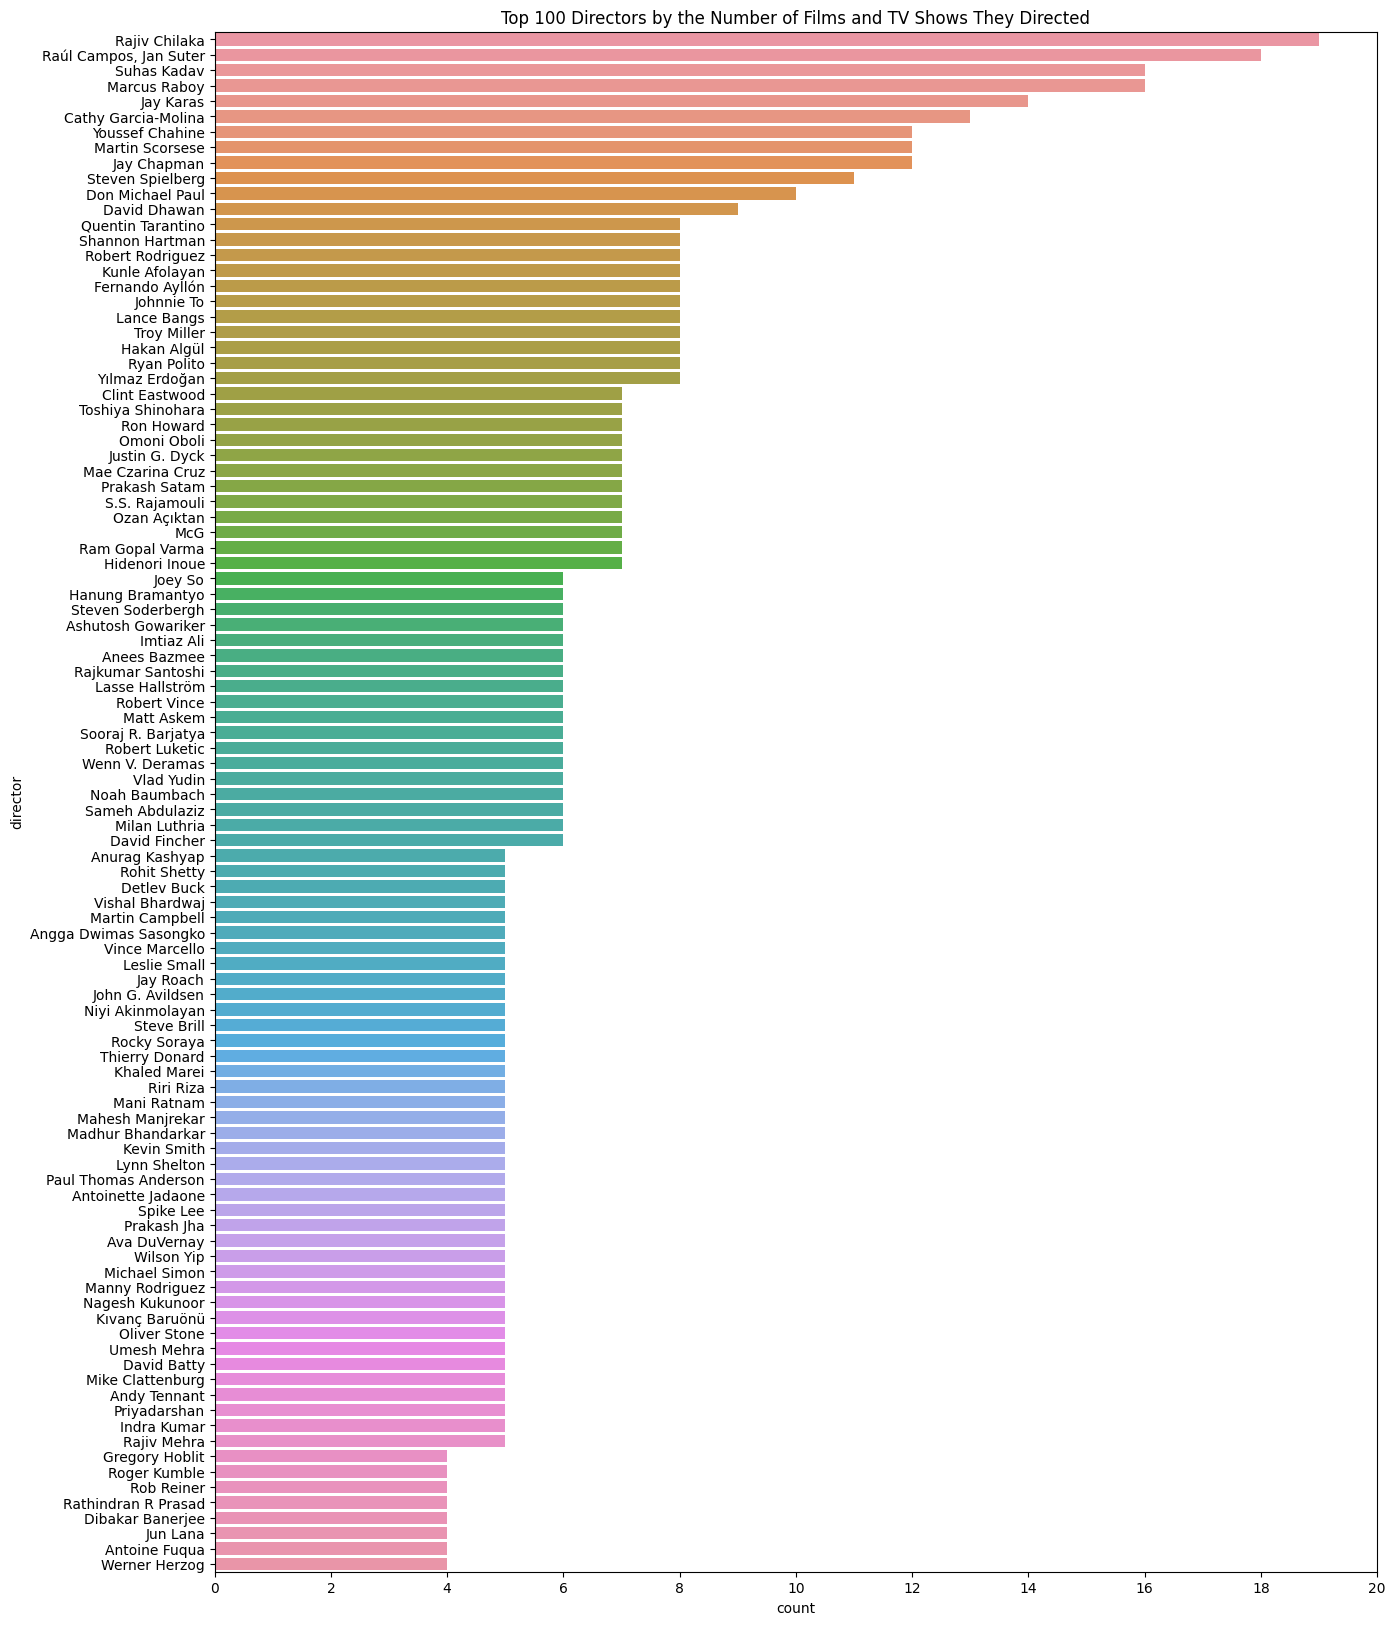

In [10]:
director_counts = data['director'].value_counts()[1:101]
plt.figure(figsize=(15, 20))
sns.countplot(y='director', data=data, order=director_counts.index)
plt.xticks([0,2,4,6,8,10,12,14,16,18,20])
plt.title('Top 100 Directors by the Number of Films and TV Shows They Directed')
plt.show()

**Distribution of Countries Produced Films and TV Shows**

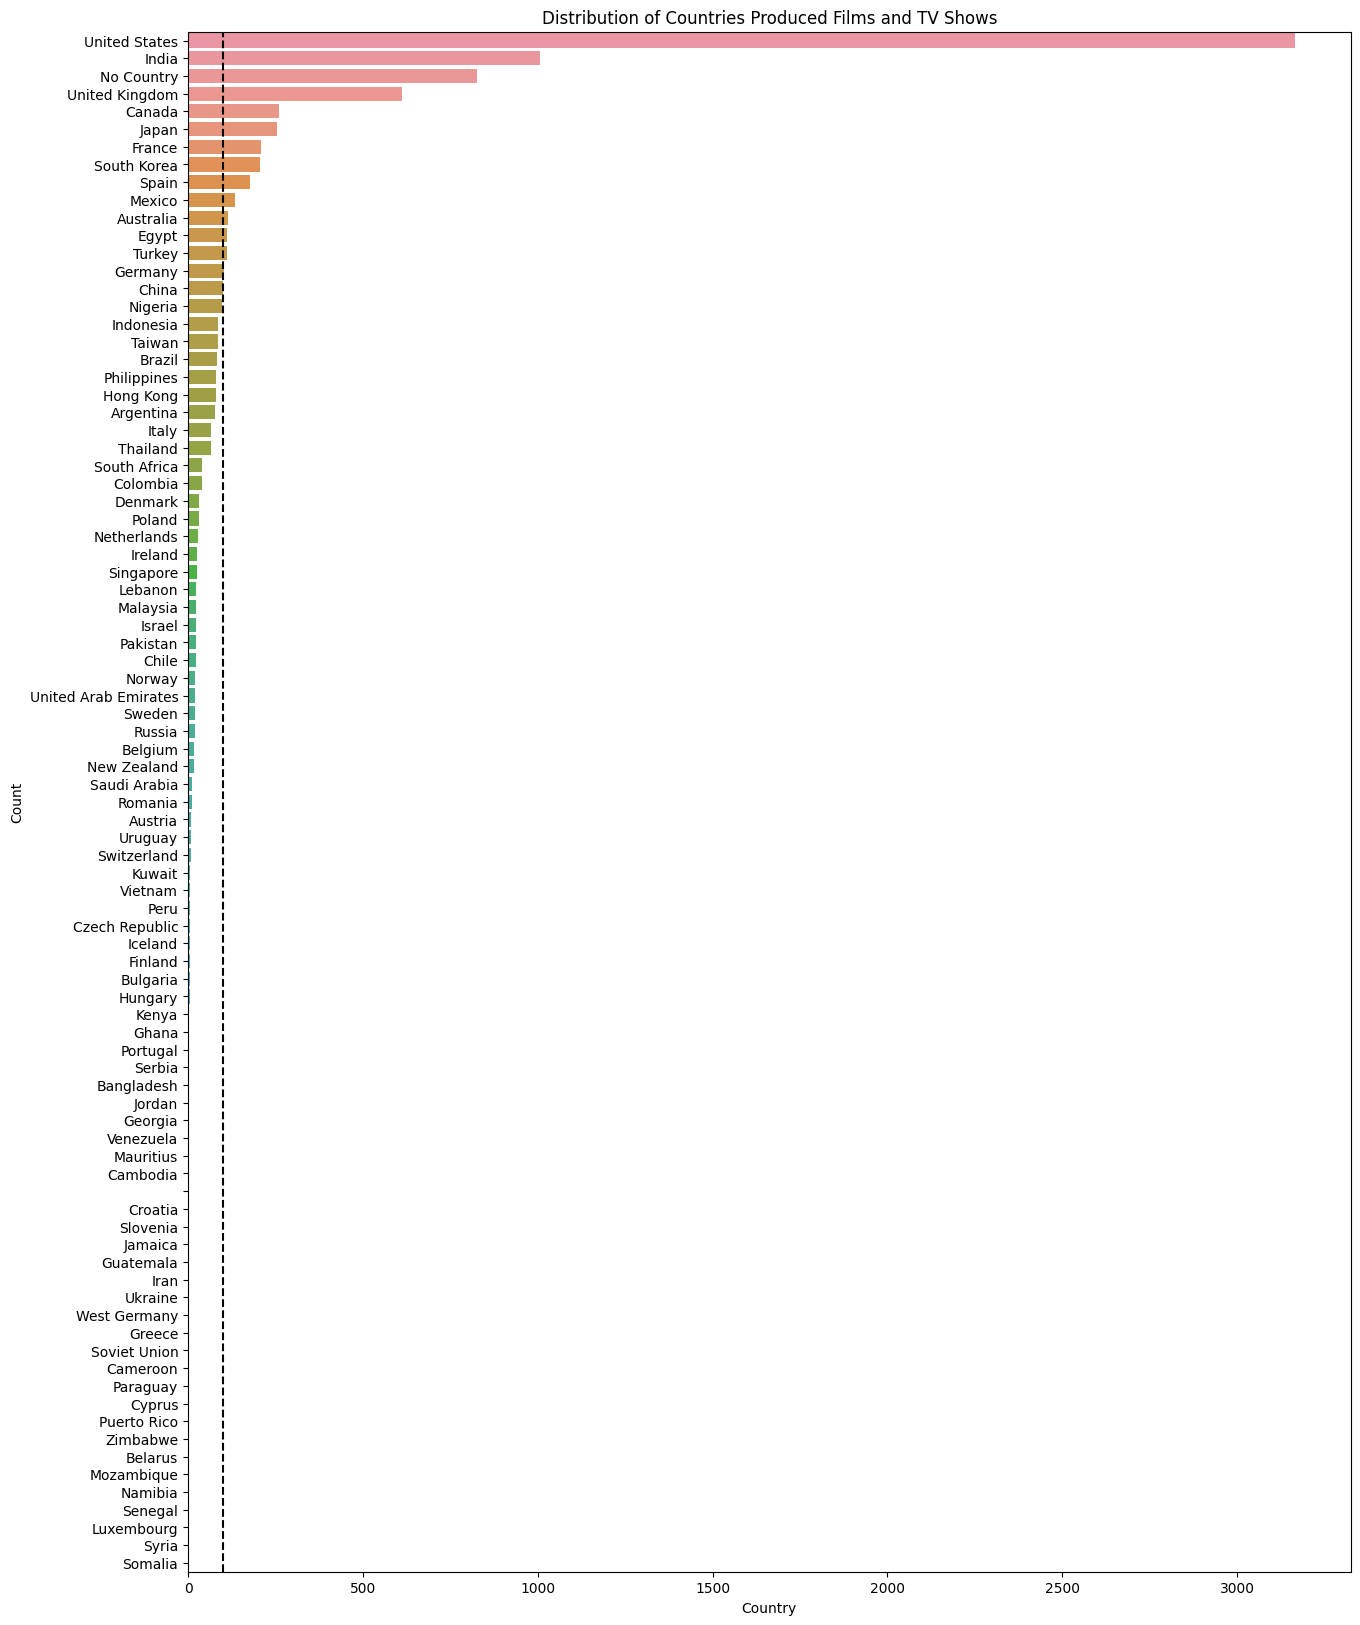

In [11]:
country_counts = data['country'].value_counts()
plt.figure(figsize=(15, 20))
sns.countplot(data=data, y='country',order=country_counts.index)

average_count = country_counts.mean()

plt.axvline(x=average_count, color='black', linestyle='--', label='Average Count')
plt.xlabel('Country')
plt.ylabel('Count')
plt.title('Distribution of Countries Produced Films and TV Shows')
plt.show()

**Distribution of Movies and TV Shows Release Years**

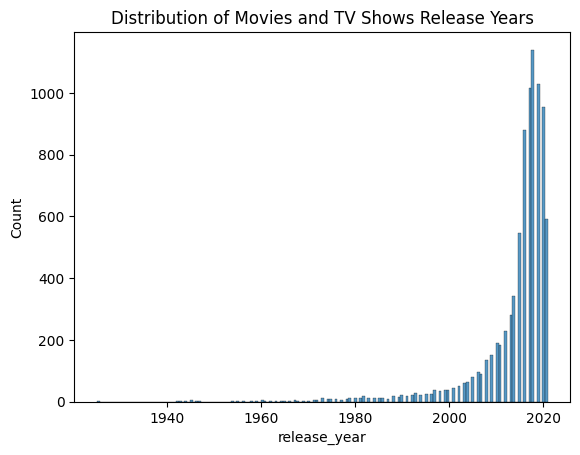

In [12]:
sns.histplot(data=data, x='release_year')
plt.title('Distribution of Movies and TV Shows Release Years')
plt.show()


**Distribution of Movie Durations**

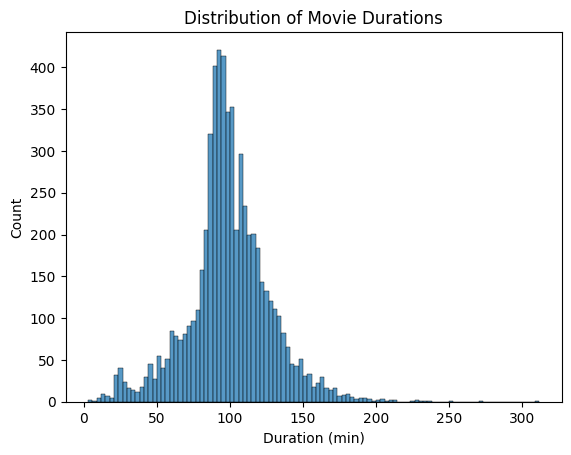

In [13]:
df['duration_movie'] = df['duration_movie'].str.replace(' min', '')
df['duration_movie'] = df['duration_movie'].replace('', pd.NA)
df['duration_movie'] = df['duration_movie'].dropna().astype(int)

sns.histplot(x='duration_movie', data=df)
plt.xlabel('Duration (min)')
plt.title('Distribution of Movie Durations')
plt.show()

**TV shows seasons**

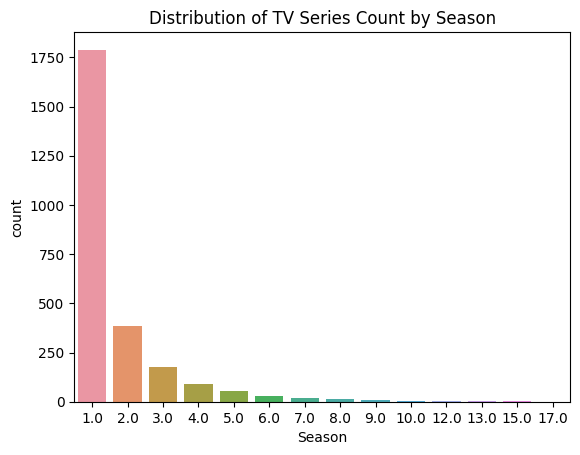

In [14]:
df['duration_tvseries'] = df['duration_tvseries'].str.replace(' Season','')
df['duration_tvseries'] = df['duration_tvseries'].str.replace(' Seasons','')
df['duration_tvseries'] = df['duration_tvseries'].str.replace('s','')
df['duration_tvseries'] = df['duration_tvseries'].replace('', pd.NA)
df['duration_tvseries'] = df['duration_tvseries'].dropna().astype(int)
sns.countplot(data=df,x='duration_tvseries')
plt.xlabel('Season')
plt.title('Distribution of TV Series Count by Season')
plt.show()


**Top 10 Longest Series on Netflix**

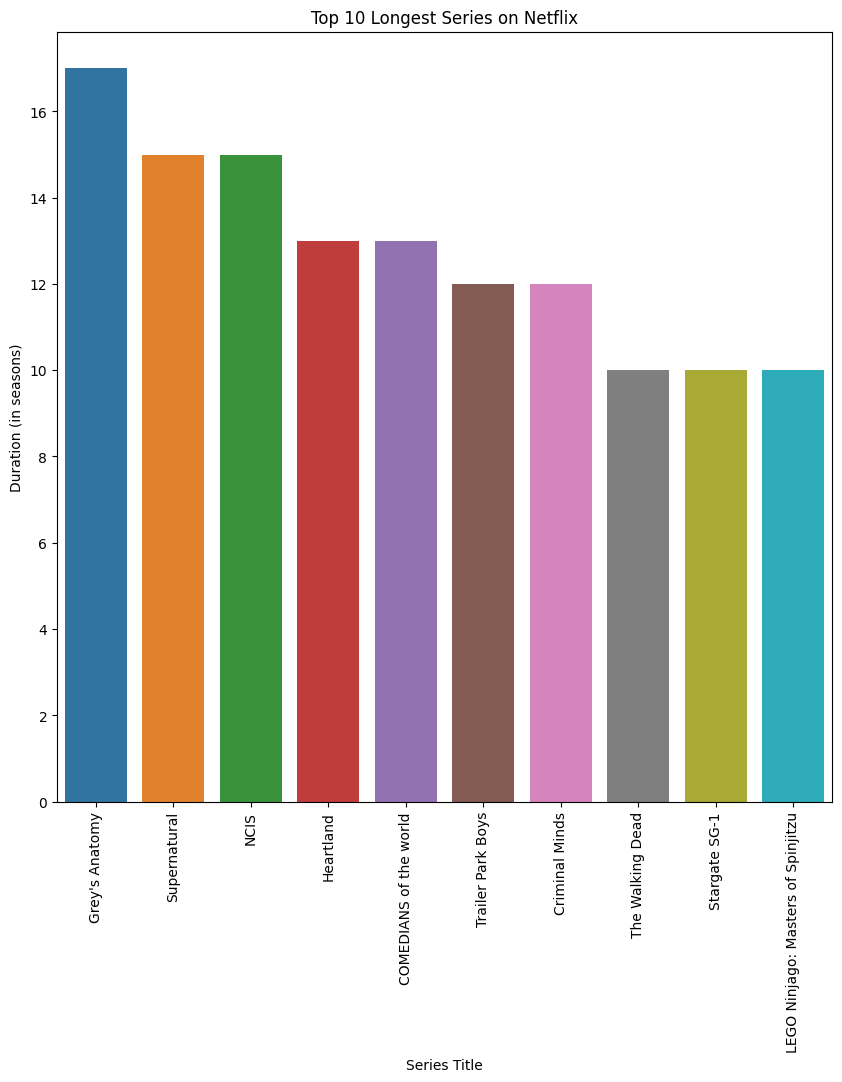

In [15]:
longest_series = df.nlargest(10, 'duration_tvseries')
plt.figure(figsize=(10, 10))
sns.barplot(data=longest_series, x='title', y='duration_tvseries')
plt.xlabel('Series Title')
plt.ylabel('Duration (in seasons)')
plt.xticks(rotation=90)
plt.title('Top 10 Longest Series on Netflix')
plt.show()


**Distribution of Ratings**

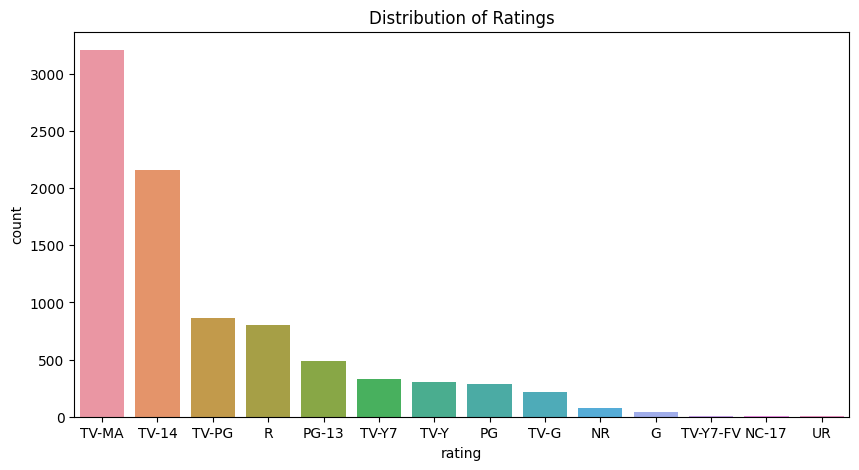

In [16]:
plt.figure(figsize=(10, 5))

sns.countplot(data=df, x='rating', order=data['rating'].value_counts().index)
plt.title('Distribution of Ratings')
plt.show()

**Top 10 Categories on Netflix**

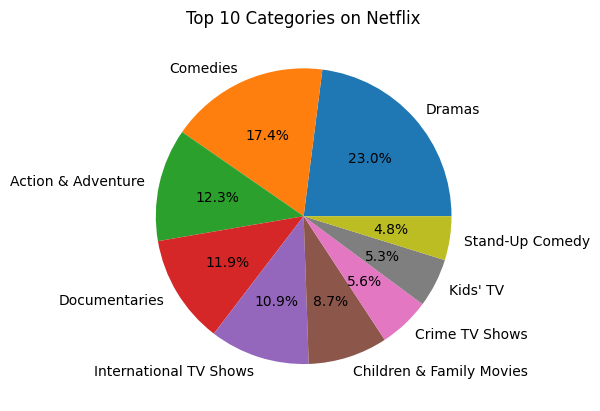

In [17]:
counts = data['listed_in'].value_counts()[0:9]
plt.pie(counts, labels=counts.index,autopct='%1.1f%%')
plt.title('Top 10 Categories on Netflix')
plt.show()

**List of most actors who have appeared in Netflix productions.**

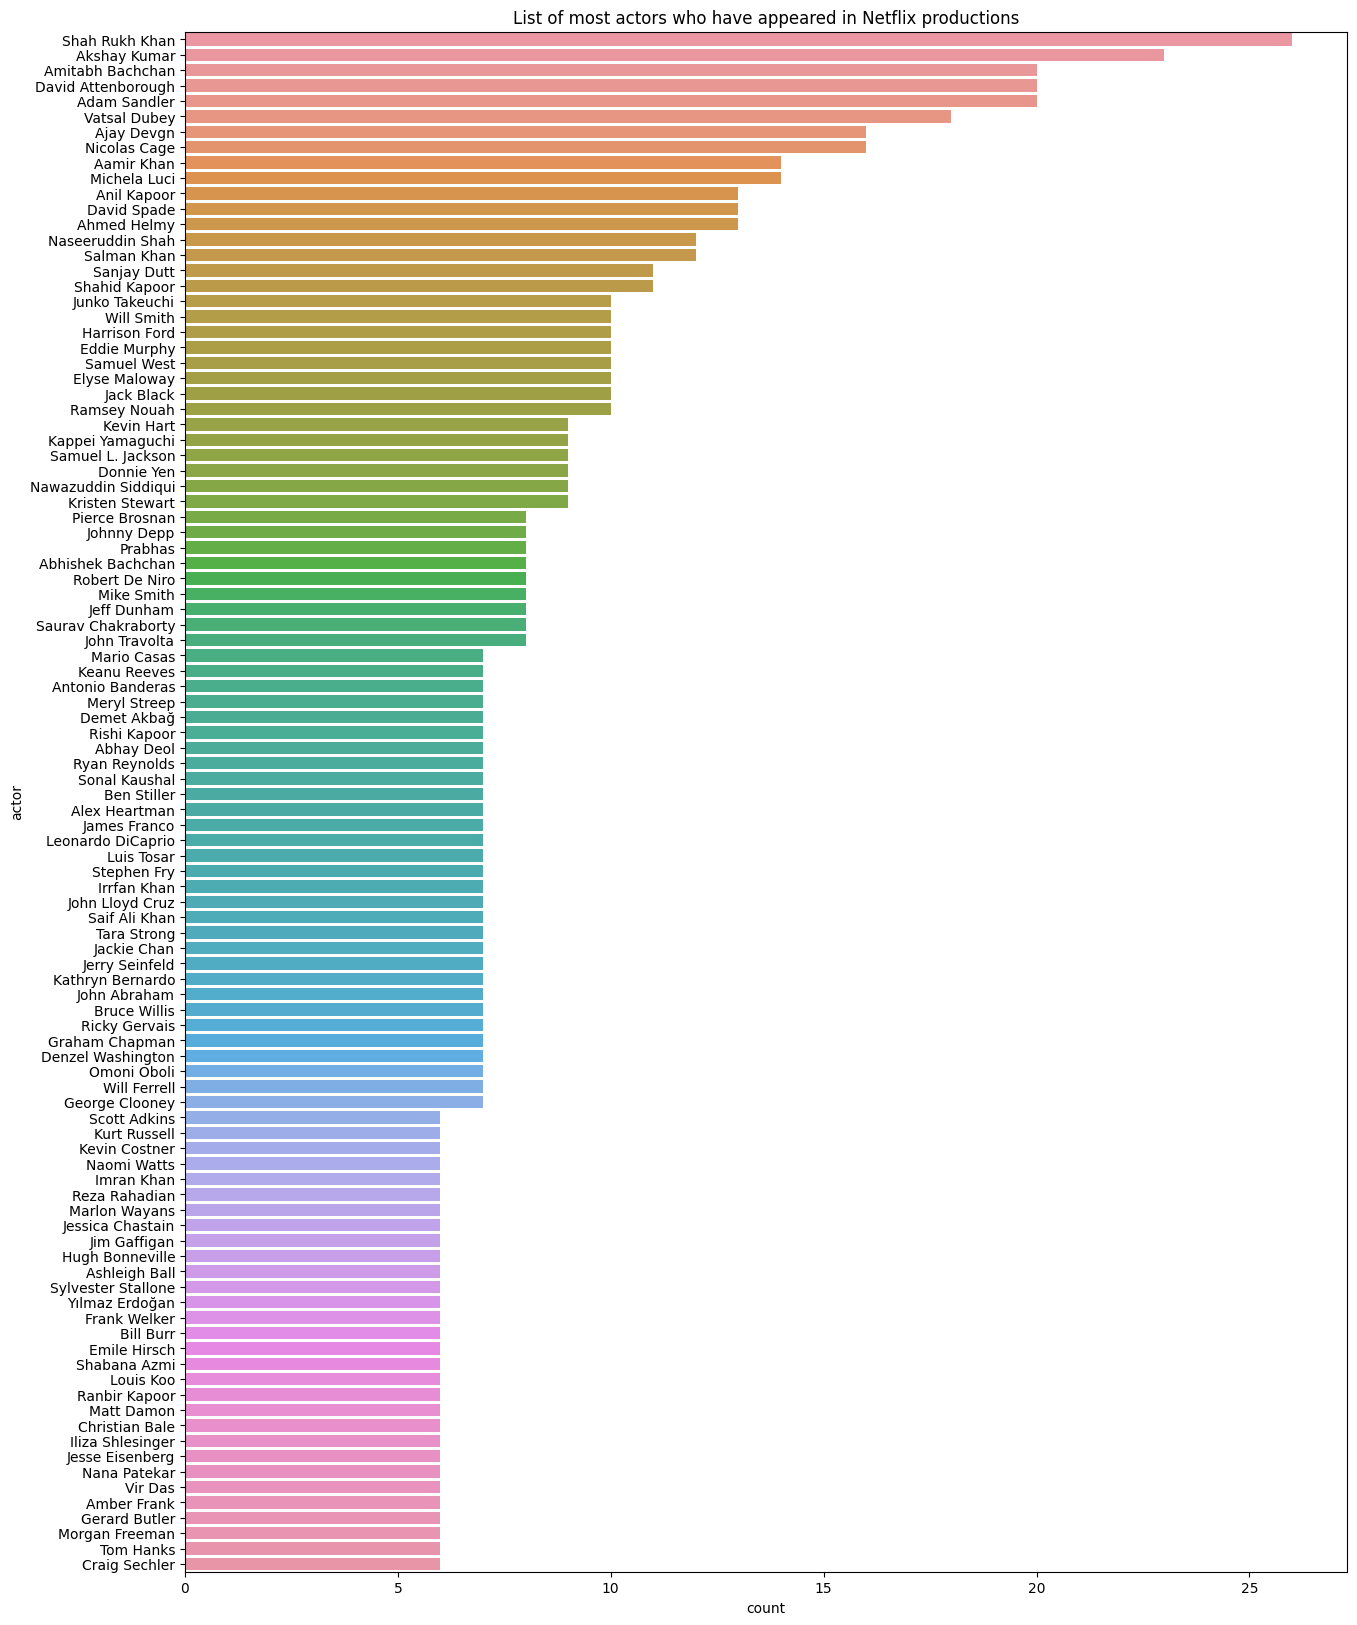

In [18]:
director_counts = data['cast'].value_counts()[1:101]
plt.figure(figsize=(15, 20))
sns.countplot(y='cast', data=data, order=director_counts.index)
plt.ylabel('actor')
plt.title('List of most actors who have appeared in Netflix productions')
plt.show()

**Distribution of Netflix Movies and TV Shows by Year**

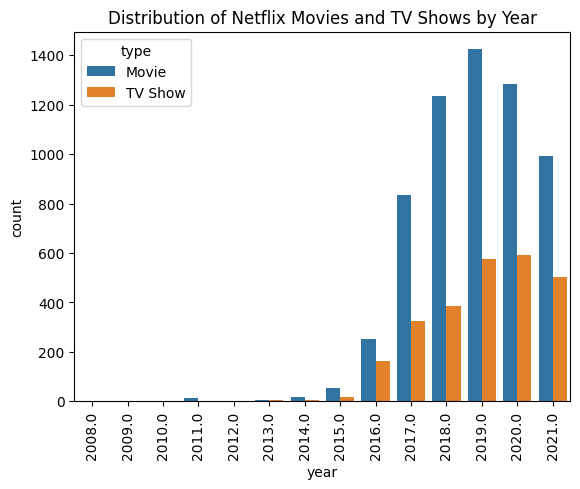

In [19]:
ax = sns.countplot(x='year', hue='type', data=df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.title('Distribution of Netflix Movies and TV Shows by Year')
plt.show()



**Distribution of Netflix Movies and TV Shows Added Over the Years**

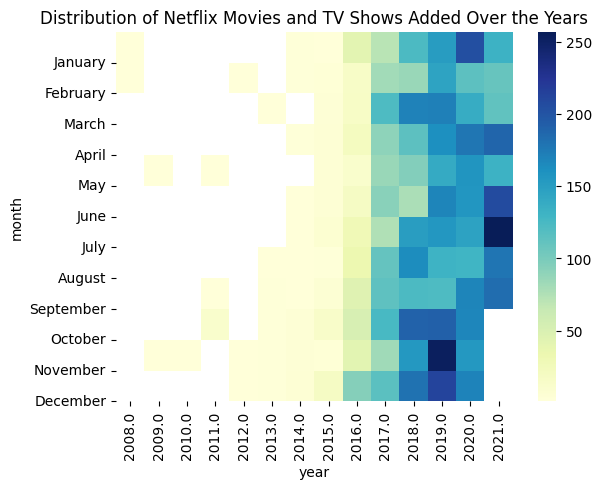

In [20]:
shows = df.pivot_table(index="month", columns="year", values="show_id", aggfunc='size')
sns.heatmap(shows, cmap="YlGnBu", annot=False)
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
plt.yticks(ticks=range(1, 13), labels=month_order, rotation=0)
plt.title("Distribution of Netflix Movies and TV Shows Added Over the Years")
plt.show()
